In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)
from XCrystal import *

In [2]:
xcr = XCrystal(XCr_path+'/config/C400_9p8keV_LaueFig1.yaml')
pp=xcr.configure(0,0)

No deformation model was selected


'delta_theta' is the deviation from the Bragg angle

In [3]:

def single_realization_with_data(delta_theta,omega): 
    
    xcr = XCrystal(XCr_path+'/config/C400_9p8keV_LaueFig1.yaml',omega)
    xcr.configure(delta_theta,0)
    xcr.run3D()
    return xcr.Reflectivity, xcr.Transmission, xcr.U1_field, xcr.U2_field, xcr.u, xcr.M

In [4]:
omega0=9831.0
deviation_from_Bragg_angle=1.5e-6

In [5]:
U1_data = []
U2_data = []

U2_data = []
U2_data = []
Rs, Ts, U1_xyz, U2_xyz, up, MM = single_realization_with_data(deviation_from_Bragg_angle, omega0)
U1_data.append(U1_xyz)
U2_data.append(U2_xyz)

U1_xyz = np.asarray(U1_data)
U2_xyz = np.asarray(U2_data)

No deformation model was selected


Beam propagation progress: 100%|██████████| 4000/4000 [03:50<00:00, 17.37it/s]


Photon energy (omega):  9831.0 ; Reflectivity:  0.5058111797869783 ; Transmission:  0.3880802409416843


In [6]:
ket12=np.sum(U1_xyz[0,:,0,:]*np.conj(U2_xyz[0,:,0,:]),axis=0)
ket21=np.sum(U2_xyz[0,:,0,:]*np.conj(U1_xyz[0,:,0,:]),axis=0)+1e-15
thet=np.unwrap(np.angle(-ket12/ket21)) # phase difference between U1_xyz and U2_xyz calculatef from energy conservation

In [7]:
Ints=np.abs(U1_xyz[0,:,0,:] + U2_xyz[0,:,0,:]*np.exp(1j*thet/2))**2
Ints2=np.abs(U1_xyz[0,:,0,:]*0 + U2_xyz[0,:,0,:]*np.exp(1j*thet/2))**2
Ints1=np.abs(U1_xyz[0,:,0,:] + 0*U2_xyz[0,:,0,:]*np.exp(1j*thet/2))**2
SumInts=np.abs(U1_xyz[0,:,0,:])**2 + np.abs(U2_xyz[0,:,0,:])**2

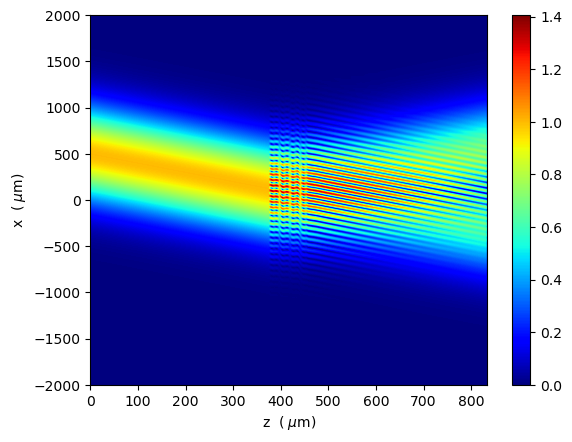

In [8]:

plt.imshow(Ints[:,:]**0.5,extent=[0,xcr.M*xcr.Z/xcr.convr*1e6,-xcr.xx.max()/xcr.convr*1e6,xcr.xx.max()/xcr.convr*1e6], aspect='auto',cmap='jet')
plt.ylabel(r'x  ( $\mu$m)')
plt.xlabel(r'z  ( $\mu$m)')
plt.colorbar()


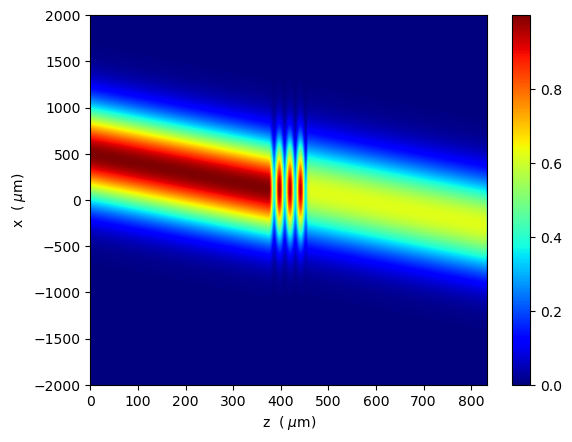

In [9]:
plt.imshow(Ints2[:,:]**0.5,extent=[0,xcr.M*xcr.Z/xcr.convr*1e6,-xcr.xx.max()/xcr.convr*1e6,xcr.xx.max()/xcr.convr*1e6], aspect='auto',cmap='jet')
plt.ylabel(r'x  ( $\mu$m)')
plt.xlabel(r'z  ( $\mu$m)')
plt.colorbar()


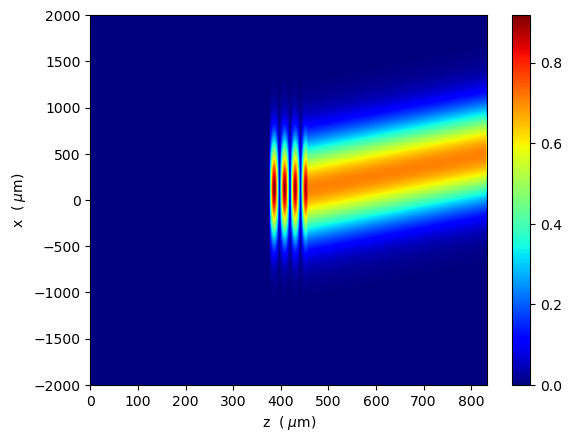

In [10]:
plt.imshow(Ints1[:,:]**0.5,extent=[0,xcr.M*xcr.Z/xcr.convr*1e6,-xcr.xx.max()/xcr.convr*1e6,xcr.xx.max()/xcr.convr*1e6], aspect='auto',cmap='jet')
plt.ylabel(r'x  ( $\mu$m)')
plt.xlabel(r'z  ( $\mu$m)')
plt.colorbar()

In [11]:

En=np.sum(Ints,axis=0) 
EnSumInt=np.sum(SumInts,axis=0) 


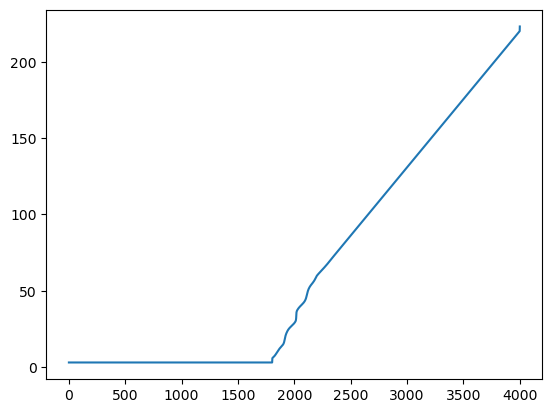

In [12]:
plt.plot(thet)


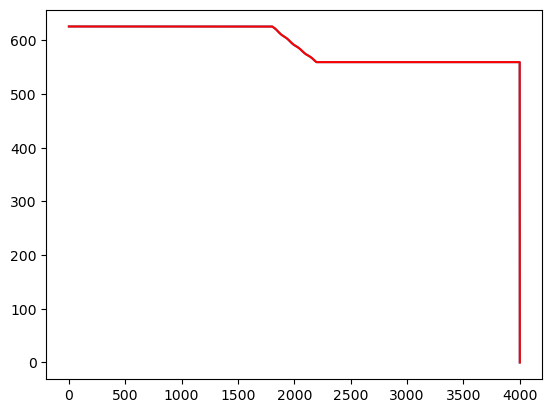

In [13]:
plt.plot(En)
plt.plot((EnSumInt),'r')
#plt.ylim(300,330)
plt.show()
